In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot  as plt
from utils import * 

# Part 1

In [ ]:
linear_data = pd.read_csv("linear_function_data.txt", header=None, sep="\s")

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
x = linear_data[0].values
y = linear_data[1].values

In [ ]:
X = np.vstack([x, np.zeros(len(x))]).T

In [ ]:
A, b = np.linalg.lstsq(X, y, rcond=1e0-6)[0]

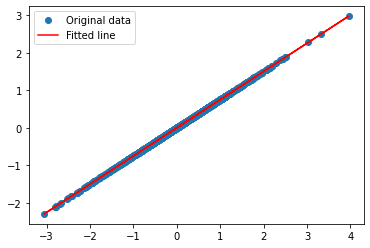

In [ ]:
plt.plot(x, y, 'o', label='Original data')
plt.plot(x, A*x + b, 'r', label='Fitted line')
plt.legend()
plt.show()

# Part 2

In [ ]:
nonlinear_data = pd.read_csv("nonlinear_function_data.txt", header=None, sep="\s")

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
x = nonlinear_data[0].values
y = nonlinear_data[1].values

In [ ]:
X = np.vstack([x, np.zeros(len(x))]).T

In [ ]:
A, b = np.linalg.lstsq(X, y, rcond=1e0-6)[0]

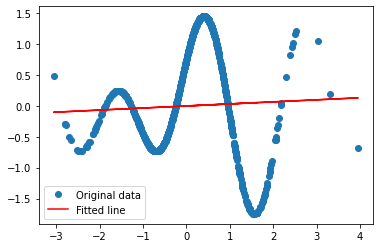

In [ ]:
plt.plot(x, y, 'o', label='Original data')
plt.plot(x, A*x + b, 'r', label='Fitted line')
plt.legend()
plt.show()

# Part3

In [ ]:
nonlinear_data = pd.read_csv("nonlinear_function_data.txt", header=None, sep="\s")

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
nonlinear_data = nonlinear_data.sort_values(by=0).reset_index(drop=True)

In [ ]:
x.reshape(-1,1).shape

(1000, 1)

In [ ]:
x = nonlinear_data[0].values.reshape(-1,1)
y = nonlinear_data[1].values.reshape(-1,1)

In [ ]:
xl = np.linspace(-3.1, 4.1 , 10)

In [ ]:
eps = np.std(x)

In [ ]:
eps, np.var(x)

(0.9810041339322116, 0.9623691107920885)

## eps => var (eps**2)

In [ ]:
phi_x = np.vstack([radial_basis_function_slow(center, x, eps) for center in xl]).T
phi_x.shape

(1000, 10)

In [ ]:
C = np.linalg.lstsq(phi_x, y, rcond=1e0-6)[0].T
f_hat = phi_x@C.T

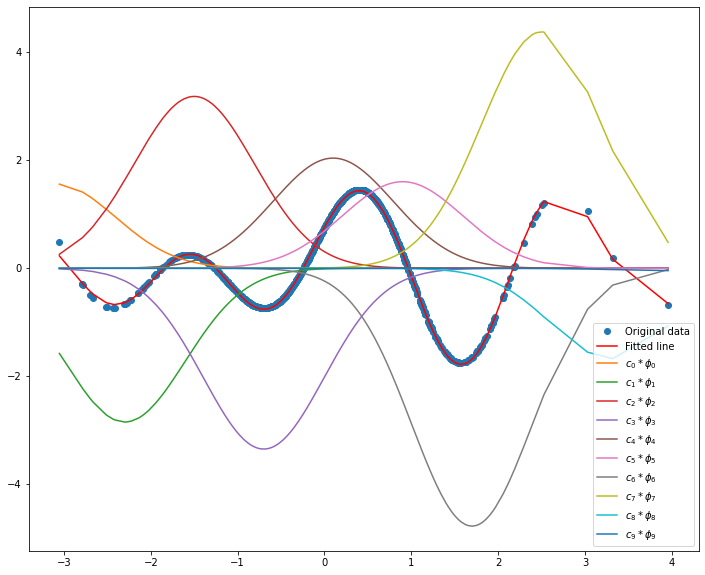

In [ ]:
index = 1
plot_xl = xl[::index]
plot_c = C[::index][0]

plt.figure(figsize=(12, 10))
plt.plot(x, y, 'o', label='Original data')
plt.plot(x, f_hat, 'r', label='Fitted line')
for i, (center, coeff) in enumerate(zip(plot_xl, plot_c)):
    j = index * i
    rbf = radial_basis_function(center, x, eps)
    plt.plot(x, coeff*rbf, label='$c_{}*\phi_{}$'.format(j, j))
plt.legend()


## eps => std (eps)

In [ ]:
phi_x = np.vstack([radial_basis_function_slow(center, x, eps, False) for center in xl]).T
phi_x.shape

(1000, 10)

In [ ]:
C = np.linalg.lstsq(phi_x, y, rcond=1e0-6)[0].T
f_hat = phi_x@C.T

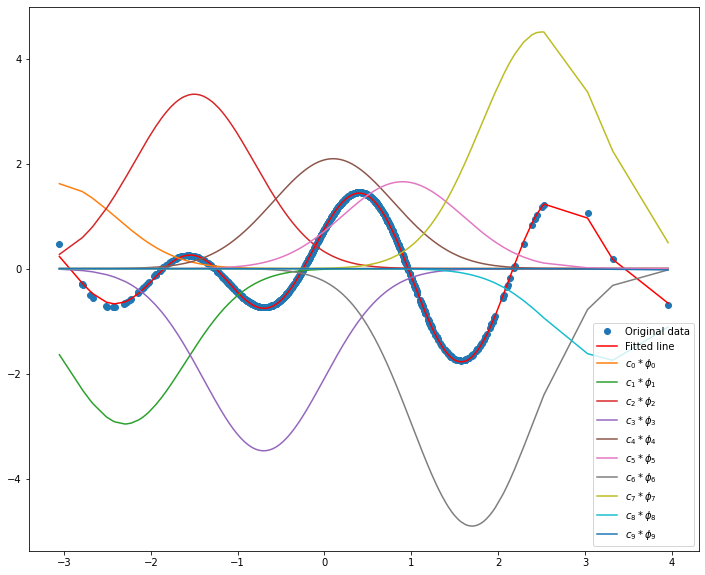

In [ ]:
index = 1
plot_xl = xl[::index]
plot_c = C[::index][0]

plt.figure(figsize=(12, 10))
plt.plot(x, y, 'o', label='Original data')
plt.plot(x, f_hat, 'r', label='Fitted line')
for i, (center, coeff) in enumerate(zip(plot_xl, plot_c)):
    j = index * i
    rbf = radial_basis_function(center, x, eps)
    plt.plot(x, coeff*rbf, label='$c_{}*\phi_{}$'.format(j, j))
plt.legend()
